In [5]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

In [6]:
data = pd.read_csv('logistic_reg_data.csv')
data.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,y
count,500.000000,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,500.000000
mean,249.500000,-0.015777,0.334002,-0.001484,2.022817e-01,2.770684e-03,0.494000
std,144.481833,0.578292,0.301507,0.383111,2.738984e-01,3.107472e-01,0.500465
min,0.000000,-0.997592,0.000005,-0.992794,2.276756e-11,-9.880191e-01,0.000000
25%,124.750000,-0.515144,0.064052,-0.136718,4.102616e-03,-3.628888e-02,0.000000
50%,249.500000,-0.026042,0.254724,-0.000018,6.488454e-02,-1.278838e-08,0.000000
75%,374.250000,0.475396,0.555544,0.107440,3.086316e-01,2.428165e-02,1.000000
max,499.000000,0.999652,0.999305,0.998957,9.986100e-01,9.982628e-01,1.000000


In [7]:
model_ppc1 = CmdStanModel(stan_file='logistic_regression_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [8]:
data.iloc[:,0:5].values

array([[ 0.00000000e+00, -3.18816202e-01,  1.01643771e-01,
        -3.24056810e-02,  1.03314562e-02],
       [ 1.00000000e+00,  8.23792808e-01,  6.78634591e-01,
         5.59054295e-01,  4.60544908e-01],
       [ 2.00000000e+00, -9.48919819e-01,  9.00448822e-01,
        -8.54453733e-01,  8.10808081e-01],
       ...,
       [ 4.97000000e+02,  9.91789426e-01,  9.83646266e-01,
         9.75569966e-01,  9.67559977e-01],
       [ 4.98000000e+02,  7.14850034e-01,  5.11010572e-01,
         3.65295925e-01,  2.61131804e-01],
       [ 4.99000000e+02, -8.91617854e-01,  7.94982398e-01,
        -7.08820500e-01,  6.31997014e-01]])

In [9]:
R=1000
data_ppc= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=10)
sim_ppc1=model_ppc1.sample(data=data_ppc, 
                           iter_sampling=R, iter_warmup=0, 
                           chains=1, 
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


Task 1.

1. Plot histograms of beta for prior model
2. Plot again the same histograms but this time with other sigma values. For instace use values: 5, 2, 0.75.
3. Consider which result should be taken into account when selecting prior.

In [10]:
df = sim_ppc1.draws_pd()
df

,lp__,accept_stat__,prob_ppc[1],prob_ppc[2],prob_ppc[3],prob_ppc[4],prob_ppc[5],prob_ppc[6],prob_ppc[7],prob_ppc[8],...,prob_ppc[497],prob_ppc[498],prob_ppc[499],prob_ppc[500],beta[1],beta[2],beta[3],beta[4],beta[5],alpha
0,0.0,0.0,0.183287,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.0,1.0,1.0,1.0,27.081700,7.771810,-12.72270,1.27591,-13.89420,2.461620
1,0.0,0.0,0.001395,1.000000,9.999850e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.0,1.0,1.0,1.0,11.987300,22.653300,9.70844,5.55378,5.98941,-0.220250
2,0.0,0.0,0.003400,0.999978,9.937780e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.0,1.0,1.0,1.0,13.120500,-3.421260,-3.11130,16.60650,-1.88132,-5.897550
3,0.0,0.0,0.105054,0.999762,9.988950e-01,9.988680e-01,9.998770e-01,9.999960e-01,1.000000e+00,1.000000e+00,...,1.0,1.0,1.0,1.0,2.843390,-0.719950,1.15899,6.39209,8.91681,-2.374610
4,0.0,0.0,0.988406,0.000006,1.000000e+00,1.000000e+00,9.293960e-01,3.276330e-02,9.999810e-01,9.999990e-01,...,1.0,1.0,1.0,1.0,0.966513,-17.072100,0.98292,-6.49448,11.80830,-1.429630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.261543,0.999059,9.999940e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.0,1.0,1.0,1.0,7.998350,0.786523,-9.13510,1.56640,7.67012,0.112832
996,0.0,0.0,0.900896,0.254183,9.972670e-01,1.115060e-01,6.653730e-05,2.696730e-06,5.196770e-06,1.235530e-06,...,0.0,0.0,0.0,0.0,-2.438420,-4.535120,6.52074,0.27651,0.91221,0.098090
997,0.0,0.0,0.789632,0.000560,3.397850e-09,7.047700e-10,8.571500e-12,2.941140e-15,6.341000e-18,3.968210e-21,...,0.0,0.0,0.0,0.0,-6.799870,-1.190060,-6.19289,4.38884,0.72679,1.707480
998,0.0,0.0,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.0,1.0,1.0,1.0,5.223800,-7.571770,19.73160,-3.85811,-4.31394,10.289300


In [11]:
beta=sim_ppc1.stan_variable('beta')
beta

array([[ 27.0817 ,   7.77181, -12.7227 ,   1.27591, -13.8942 ],
       [ 11.9873 ,  22.6533 ,   9.70844,   5.55378,   5.98941],
       [ 13.1205 ,  -3.42126,  -3.1113 ,  16.6065 ,  -1.88132],
       ...,
       [ -6.79987,  -1.19006,  -6.19289,   4.38884,   0.72679],
       [  5.2238 ,  -7.57177,  19.7316 ,  -3.85811,  -4.31394],
       [  7.70539,   2.08335,  15.1998 ,   4.82109,  -6.60703]])

Text(0.5, 1.0, 'sigma=10')

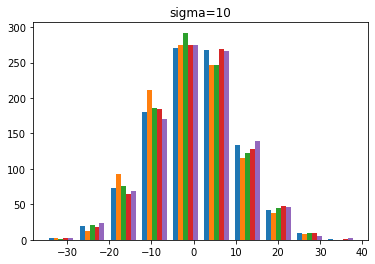

In [12]:
plt.hist(beta)
plt.title('sigma=10')

In [13]:
R=1000
data_ppc= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=5)
sim_ppc2=model_ppc1.sample(data=data_ppc, 
                           iter_sampling=R, iter_warmup=0, 
                           chains=1, 
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [14]:
df = sim_ppc1.draws_pd()
beta=sim_ppc1.stan_variable('beta')
beta

array([[ 27.0817 ,   7.77181, -12.7227 ,   1.27591, -13.8942 ],
       [ 11.9873 ,  22.6533 ,   9.70844,   5.55378,   5.98941],
       [ 13.1205 ,  -3.42126,  -3.1113 ,  16.6065 ,  -1.88132],
       ...,
       [ -6.79987,  -1.19006,  -6.19289,   4.38884,   0.72679],
       [  5.2238 ,  -7.57177,  19.7316 ,  -3.85811,  -4.31394],
       [  7.70539,   2.08335,  15.1998 ,   4.82109,  -6.60703]])

Text(0.5, 1.0, 'sigma=5')

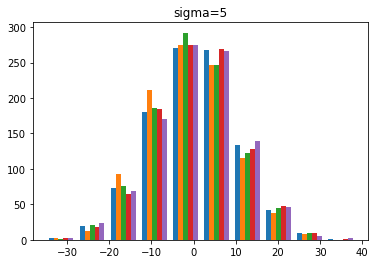

In [15]:
plt.hist(beta)
plt.title('sigma=5')

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


Text(0.5, 1.0, 'sigma=2')

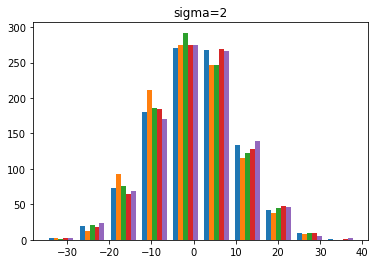

In [16]:
R=1000
data_ppc= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=2)
sim_ppc2=model_ppc1.sample(data=data_ppc, 
                           iter_sampling=R, iter_warmup=0, 
                           chains=1, 
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

df = sim_ppc1.draws_pd()
beta=sim_ppc1.stan_variable('beta')

plt.hist(beta)
plt.title('sigma=2')

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


Text(0.5, 1.0, 'sigma=0.75')

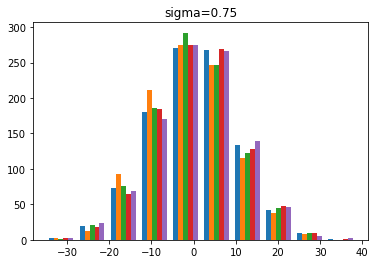

In [17]:
R=1000
data_ppc= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=0.75)
sim_ppc2=model_ppc1.sample(data=data_ppc, 
                           iter_sampling=R, iter_warmup=0, 
                           chains=1, 
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

df = sim_ppc1.draws_pd()
beta=sim_ppc1.stan_variable('beta')

plt.hist(beta)
plt.title('sigma=0.75')

Posterior inference

In [18]:
model = CmdStanModel(stan_file='logistic_regression.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [19]:
data_dict = dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 y = data.y.values
                 )
fit = model.sample(data=data_dict, seed=4938483)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:05 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▎        | 00:07 Iteration:  100 / 2000 [  5%]  (Warmup)





chain 1 |█▊        | 00:08 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▎       | 00:08 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:09 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▏      | 00:10 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:10 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:10 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:11 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:11 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:12 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:12 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:13 Iteration: 1200 / 2000


INFO:cmdstanpy:CmdStan done processing.


In [23]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-340.00000,0.045000,1.70000,-340.0000,-340.00000,-340.00000,1500.0,79.0,1.0
beta[1],-0.00024,0.000011,0.00063,-0.0013,-0.00024,0.00075,3430.0,181.0,1.0
beta[2],0.65000,0.006600,0.30000,0.1700,0.65000,1.10000,1978.0,105.0,1.0
beta[3],-0.45000,0.010000,0.47000,-1.2000,-0.44000,0.31000,2124.0,112.0,1.0
beta[4],-0.33000,0.009800,0.44000,-1.1000,-0.32000,0.39000,2022.0,107.0,1.0
...,...,...,...,...,...,...,...,...,...
prob_ppc[496],0.28000,0.001000,0.06300,0.1800,0.28000,0.39000,3863.0,204.0,1.0
prob_ppc[497],0.38000,0.000830,0.05100,0.3000,0.38000,0.47000,3741.0,198.0,1.0
prob_ppc[498],0.39000,0.001400,0.08500,0.2500,0.39000,0.53000,3942.0,208.0,1.0


In [24]:
med_prob_ppc = np.percentile(fit.stan_variable('prob_ppc'),[25,50,75],axis=0)
estimate_ppc_df = pd.DataFrame(med_prob_ppc.T,columns = ['lo','med','hi'])

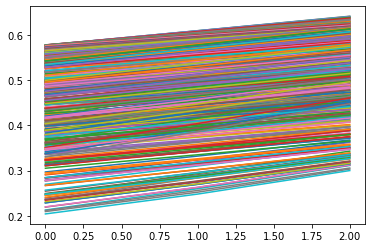

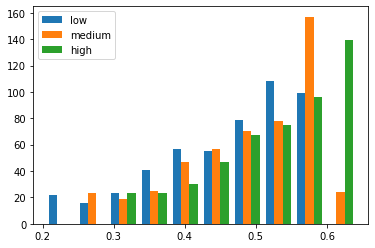

In [25]:
plt.plot(med_prob_ppc)
plt.show()


plt.hist(estimate_ppc_df)
labels= ["low","medium", "high"]
plt.legend(labels)
plt.show()

(array([253.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 247.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

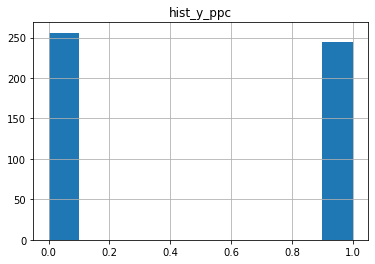

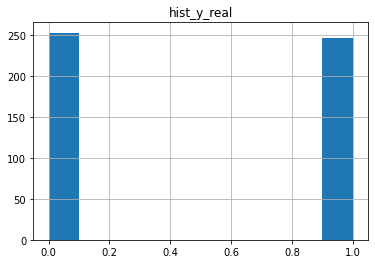

In [26]:
y_ppc=(fit.stan_variable('y_ppc')[0])
fig, ax = plt.subplots()
plt.title("hist_y_ppc")
plt.grid()
ax.hist(y_ppc, bins =10)

real_y=data["y"]
fig, ax = plt.subplots()
plt.title("hist_y_real")
plt.grid()
ax.hist(real_y, bins =10)

(array([  2.,   0.,   0.,   1.,   3.,   6.,  10.,  11.,  13.,  29.,  34.,
         61.,  84., 108., 124., 172., 243., 236., 296., 273., 297., 320.,
        336., 250., 235., 205., 173., 146.,  98.,  89.,  54.,  33.,  23.,
         14.,   8.,   6.,   3.,   2.,   1.,   1.]),
 array([0.40569496, 0.40986604, 0.41403713, 0.41820821, 0.4223793 ,
        0.42655038, 0.43072147, 0.43489255, 0.43906364, 0.44323473,
        0.44740581, 0.4515769 , 0.45574798, 0.45991907, 0.46409015,
        0.46826124, 0.47243232, 0.47660341, 0.48077449, 0.48494558,
        0.48911667, 0.49328775, 0.49745884, 0.50162992, 0.50580101,
        0.50997209, 0.51414318, 0.51831426, 0.52248535, 0.52665643,
        0.53082752, 0.5349986 , 0.53916969, 0.54334078, 0.54751186,
        0.55168295, 0.55585403, 0.56002512, 0.5641962 , 0.56836729,
        0.57253837]),
 <BarContainer object of 40 artists>)

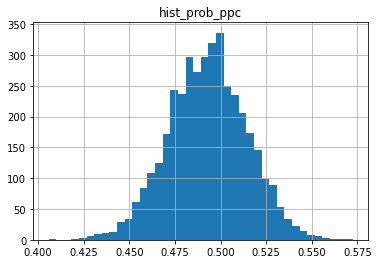

In [27]:
prob_ppc=(fit.stan_variable('prob_ppc'))
mean_prob_ppc=[]
x=0
for a in prob_ppc:
    mean_prob_ppc.append(a.mean())
    x=x+1
fig, ax = plt.subplots()
plt.title("hist_prob_ppc")
plt.grid()
ax.hist(mean_prob_ppc, bins =40)

Task 2.

Edit stan model and create models with different priors. Use original setting and some priors from task 1.
Fit the model
Plot the probability of individual outcome:
plot generated paramether theta (prob_pcc): mean with its error bars (plt.errorbar)
to plot its error bars take into consider its 25th, 50th and 75th percentile
also mark the real value of y, by different colored dots (for mean values)
Consider if the probability was well captured by each setting

INFO:cmdstanpy:compiling stan file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L05/logistic_regression_beta_5.stan to exe file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L05/logistic_regression_beta_5
INFO:cmdstanpy:compiled model executable: /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L05/logistic_regression_beta_5
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L05/logistic_regression_beta_5.hpp /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L05/logistic_regression_beta_5.stan
Warning in '/Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L05/logistic_regression_beta_5.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/Users/piotrszyller/Documents/2nd


INFO:cmdstanpy:CmdStan done processing.


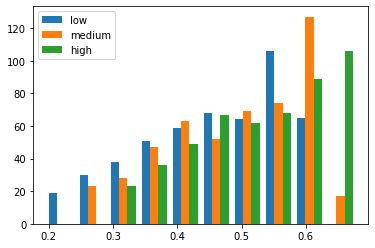

(array([  2.,   1.,   3.,   6.,   7.,  11.,  17.,  30.,  70.,  72.,  86.,
        130., 158., 190., 237., 253., 275., 293., 289., 298., 318., 259.,
        227., 175., 161., 120., 101.,  68.,  39.,  39.,  24.,  20.,   7.,
          6.,   3.,   2.,   0.,   1.,   0.,   2.]),
 array([0.41715298, 0.42131371, 0.42547443, 0.42963516, 0.43379589,
        0.43795662, 0.44211735, 0.44627807, 0.4504388 , 0.45459953,
        0.45876026, 0.46292099, 0.46708171, 0.47124244, 0.47540317,
        0.4795639 , 0.48372463, 0.48788535, 0.49204608, 0.49620681,
        0.50036754, 0.50452827, 0.508689  , 0.51284972, 0.51701045,
        0.52117118, 0.52533191, 0.52949264, 0.53365336, 0.53781409,
        0.54197482, 0.54613555, 0.55029628, 0.554457  , 0.55861773,
        0.56277846, 0.56693919, 0.57109992, 0.57526064, 0.57942137,
        0.5835821 ]),
 <BarContainer object of 40 artists>)

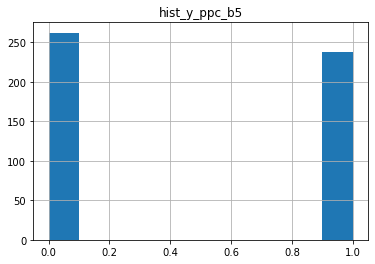

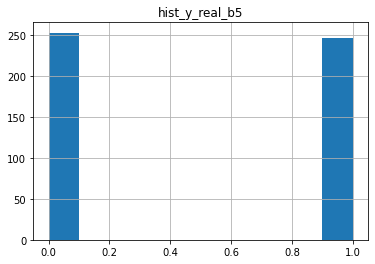

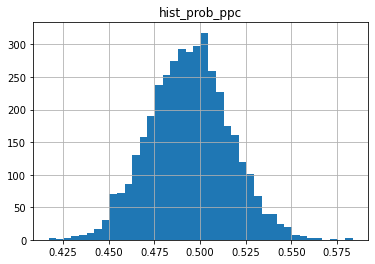

In [29]:
model_b5 = CmdStanModel(stan_file='logistic_regression_beta_5.stan')
fit_b5 = model_b5.sample(data=data_dict, seed=4938483)
#plot
med_prob_ppc = np.percentile(fit_b5.stan_variable('prob_ppc'),[25,50,75],axis=0)
estimate_ppc_df = pd.DataFrame(med_prob_ppc.T,columns = ['lo','med','hi'])

plt.hist(estimate_ppc_df)
labels= ["low","medium", "high"]
plt.legend(labels)
plt.show()

y_ppc_b5=(fit_b5.stan_variable('y_ppc')[0])
fig, ax = plt.subplots()
plt.title("hist_y_ppc_b5")
plt.grid()
ax.hist(y_ppc_b5, bins =10)

real_y=data["y"]
fig, ax = plt.subplots()
plt.title("hist_y_real_b5")
plt.grid()
ax.hist(real_y, bins =10)

prob_ppc_b5=(fit_b5.stan_variable('prob_ppc'))
mean_prob_ppc_5=[]
x=0
for a in prob_ppc_b5:
    mean_prob_ppc_5.append(a.mean())
    x=x+1
fig, ax = plt.subplots()
plt.title("hist_prob_ppc")
plt.grid()
ax.hist(mean_prob_ppc_5, bins =40)

INFO:cmdstanpy:compiling stan file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L05/logistic_regression_beta_10.stan to exe file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L05/logistic_regression_beta_10
INFO:cmdstanpy:compiled model executable: /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L05/logistic_regression_beta_10
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L05/logistic_regression_beta_10.hpp /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L05/logistic_regression_beta_10.stan
Warning in '/Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L05/logistic_regression_beta_10.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/Users/piotrszyller/Documen


INFO:cmdstanpy:CmdStan done processing.


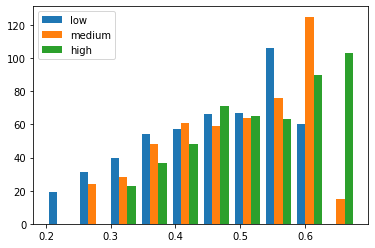

(array([253.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 247.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

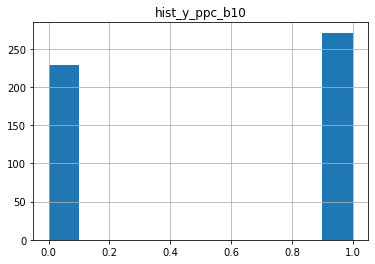

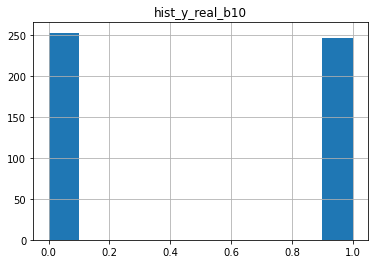

In [30]:
model_b10 = CmdStanModel(stan_file='logistic_regression_beta_10.stan')
fit_b10 = model_b10.sample(data=data_dict, seed=4938483)
#plot
med_prob_ppc = np.percentile(fit_b10.stan_variable('prob_ppc'),[25,50,75],axis=0)
estimate_ppc_df = pd.DataFrame(med_prob_ppc.T,columns = ['lo','med','hi'])

plt.hist(estimate_ppc_df)
labels= ["low","medium", "high"]
plt.legend(labels)
plt.show()

y_ppc_b10=(fit_b10.stan_variable('y_ppc')[0])
fig, ax = plt.subplots()
plt.title("hist_y_ppc_b10")
plt.grid()
ax.hist(y_ppc_b10, bins =10)

real_y=data["y"]
fig, ax = plt.subplots()
plt.title("hist_y_real_b10")
plt.grid()
ax.hist(real_y, bins =10)

(array([  2.,   2.,   5.,   5.,   6.,  11.,  23.,  35.,  55.,  70.,  66.,
        118., 142., 143., 167., 197., 223., 264., 312., 282., 301., 271.,
        262., 215., 195., 143., 115., 102.,  85.,  62.,  40.,  28.,  17.,
         17.,   6.,   3.,   3.,   5.,   1.,   1.]),
 array([0.4109005, 0.4158621, 0.4208237, 0.4257853, 0.4307469, 0.4357085,
        0.4406701, 0.4456317, 0.4505933, 0.4555549, 0.4605165, 0.4654781,
        0.4704397, 0.4754013, 0.4803629, 0.4853245, 0.4902861, 0.4952477,
        0.5002093, 0.5051709, 0.5101325, 0.5150941, 0.5200557, 0.5250173,
        0.5299789, 0.5349405, 0.5399021, 0.5448637, 0.5498253, 0.5547869,
        0.5597485, 0.5647101, 0.5696717, 0.5746333, 0.5795949, 0.5845565,
        0.5895181, 0.5944797, 0.5994413, 0.6044029, 0.6093645]),
 <BarContainer object of 40 artists>)

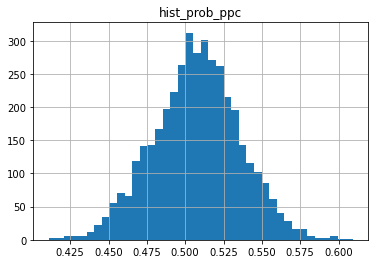

In [31]:
prob_ppc_b10=(fit_b10.stan_variable('prob_ppc'))


q25 =[]
q50 =[]
q75 =[]

x=0
for i in prob_ppc_b10:
    q25.append(np.quantile(prob_ppc_b10[x],0.25))
    q50.append(np.quantile(prob_ppc_b10[x],0.50))
    q75.append(np.quantile(prob_ppc_b10[x],0.75))
    x=x+1

fig, ax = plt.subplots()
plt.title("hist_prob_ppc")
plt.grid()
ax.hist(q50, bins =40)

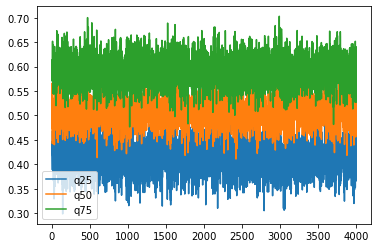

In [32]:
plt.plot(q25)
plt.plot(q50)
plt.plot(q75)
plt.legend(['q25','q50','q75'])
plt.show()